In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import utils.plot as plot_utils

In [2]:
R = 1.0 
rho_c = 3 / (2 * np.pi * R**2) * 5**5 / 6**6
alpha_c = np.sqrt(5)

offset = 10

lower_branch_alpha_vales = np.logspace(np.log10(alpha_c), np.log10(alpha_c) + 1, 100)
upper_branch_alpha_values = np.logspace(np.log10(alpha_c) - 0.5, np.log10(alpha_c), 100)

upper_branch_rho_values = [3 / (2 * np.pi * R**2) * alpha**10 / (1 + alpha**2)**6 for alpha in upper_branch_alpha_values]
upper_branch_M_ADM_values = [2 * R / alpha**2 for alpha in upper_branch_alpha_values]
upper_branch_M_rest_values = [3 / (4 * alpha**5) * (alpha - alpha**5 + (1 + alpha**2)**3 * np.arctan(1/alpha)) * R for alpha in upper_branch_alpha_values]

lower_branch_rho_values = [3 / (2 * np.pi * R**2) * alpha**10 / (1 + alpha**2)**6 for alpha in lower_branch_alpha_vales]
lower_branch_M_ADM_values = [2 * R / alpha**2 for alpha in lower_branch_alpha_vales]
lower_branch_M_rest_values = [3 / (4 * alpha**5) * (alpha - alpha**5 + (1 + alpha**2)**3 * np.arctan(1/alpha)) * R for alpha in lower_branch_alpha_vales]

# horizon starting point
halpha = 1
hrho = 3 / (2 * np.pi * R**2) * halpha**10 / (1 + halpha**2)**6
hM_ADM = 2 * R / halpha**2
hrest_M = 3 / (4 * halpha**5) * (halpha - halpha**5 + (1 + halpha**2)**3 * np.arctan(1/halpha))

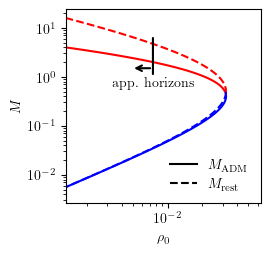

In [3]:
scale = 0.4
width = scale * plot_utils.textwidth * plot_utils.cm_to_inch
height = width
delta = 0.5
arrow_length=0.7

fig = plt.figure(figsize=(width, height))

plt.plot(upper_branch_rho_values, upper_branch_M_ADM_values, label=r"$M_{\text{ADM}}$", color='red', linewidth=1.5)
plt.plot(upper_branch_rho_values, upper_branch_M_rest_values, label=r"$M_{\text{rest}}$", color='red', linestyle='--', linewidth=1.5)
plt.plot(lower_branch_rho_values, lower_branch_M_ADM_values, color='blue', linewidth=1.5)
plt.plot(lower_branch_rho_values, lower_branch_M_rest_values, color='blue', linestyle='--', linewidth=1.5)

plt.xlim(left=np.min(upper_branch_rho_values), right=rho_c*2)

plt.annotate(
            "",
            xy=(hrho, (1 - delta) * hM_ADM),
            xytext=(hrho, (1 + delta) * hrest_M),
            arrowprops=dict(arrowstyle="-", lw=1.5, ls="-", color="black"),
        )

plt.annotate(
        "",
        xy=(
            hrho, 
            (1 - 0.5 * delta) * hM_ADM),
        xytext=(
            hrho * (1 - 0.5 * arrow_length),
            (1 - 0.5 * delta) * hM_ADM,
        ),
        arrowprops=dict(arrowstyle="<-", lw=1.5, ls="-", color="black"),
        )

plt.text(
    hrho,
    (1 - delta) * hM_ADM,
    "app. horizons",
    ha="center",
    va="top"
)

plt.ylabel(r"$M$")
plt.xlabel(r"$\rho_0$")

custom_handles = [
    Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, label=r"$M_{\text{ADM}}$"),
    Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label=r"$M_{\text{rest}}$"),
]

plt.legend(handles=custom_handles, loc="lower right", fancybox=False, frameon=False, framealpha=1)
plt.minorticks_on()
plt.xscale("log")
plt.yscale("log")
plt.savefig("img/cds_rho_vs_M.pdf", bbox_inches='tight', dpi=300) 

In [4]:
rho0 = 1
alpha_c = np.sqrt(5)

lower_branch_alpha_values = np.logspace(np.log10(alpha_c), np.log10(alpha_c) + 4, 100)
upper_branch_alpha_values = np.logspace(np.log10(alpha_c) - 4, np.log10(alpha_c), 100)

upper_branch_R_values = [np.sqrt(3 / (2 * np.pi * rho0) * alpha**10 / (1 + alpha**2)**6) for alpha in upper_branch_alpha_values]
lower_branch_R_values = [np.sqrt(3 / (2 * np.pi * rho0) * alpha**10 / (1 + alpha**2)**6) for alpha in lower_branch_alpha_values]

upper_branch_M_ADM_values = [2 * R / alpha**2 for R, alpha in zip(upper_branch_R_values, upper_branch_alpha_values)]
lower_branch_M_ADM_values = [2 * R / alpha**2 for R, alpha in zip(lower_branch_R_values, lower_branch_alpha_values)]

upper_branch_M_rest_values = [3 / (4 * alpha**5) * (alpha - alpha**5 + (1 + alpha**2)**3 * np.arctan(1/alpha)) * R for R, alpha in zip(upper_branch_R_values, upper_branch_alpha_values)]
lower_branch_M_rest_values = [3 / (4 * alpha**5) * (alpha - alpha**5 + (1 + alpha**2)**3 * np.arctan(1/alpha)) * R for R, alpha in zip(lower_branch_R_values, lower_branch_alpha_values)]

halpha = 1
hR = np.sqrt(3 / (2 * np.pi * rho0) * halpha**10 / (1 + halpha**2)**6)
hM_ADM = 2 * hR / halpha**2
hrest_M = 3 / (4 * halpha**5) * (halpha - halpha**5 + (1 + halpha**2)**3 * np.arctan(1/halpha)) * hR

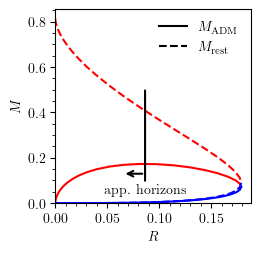

In [5]:
scale = 0.4
width = scale * plot_utils.textwidth * plot_utils.cm_to_inch
height = width
delta = 0.5
arrow_length=0.5


fig = plt.figure(figsize=(width, height))

plt.plot(upper_branch_R_values, upper_branch_M_ADM_values, label=r"$M_{\text{ADM}}$", color='red', linewidth=1.5)
plt.plot(upper_branch_R_values, upper_branch_M_rest_values, label=r"$M_{\text{rest}}$", color='red', linestyle='--', linewidth=1.5)
plt.plot(lower_branch_R_values, lower_branch_M_ADM_values, color='blue', linewidth=1.5)
plt.plot(lower_branch_R_values, lower_branch_M_rest_values, color='blue', linestyle='--', linewidth=1.5)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel(r"$R$")
plt.ylabel(r"$M$")

custom_handles = [
    Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, label=r"$M_{\text{ADM}}$"),
    Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label=r"$M_{\text{rest}}$"),
]



plt.legend(handles=custom_handles, loc="upper right", fancybox=False, frameon=False, framealpha=1)
plt.minorticks_on()


plt.annotate(
            "",
            xy=(hR, (1 - delta) * hM_ADM),
            xytext=(hR, (1 + 0.5 *delta) * hrest_M),
            arrowprops=dict(arrowstyle="-", lw=1.5, ls="-", color="black"),
        )

plt.annotate(
        "",
        xy=(
            hR, 
            (1 - 0.5 * delta) * hM_ADM),
        xytext=(
            hR * (1 - 0.5 * arrow_length),
            (1 - 0.5 * delta) * hM_ADM,
        ),
        arrowprops=dict(arrowstyle="<-", lw=1.5, ls="-", color="black"),
        )


plt.text(
    hR,
    (1 - delta) * hM_ADM,
    "app. horizons",
    ha="center",
    va="top"
)


plt.savefig("img/cds_rho_vs_R.pdf", bbox_inches='tight', dpi=300) 



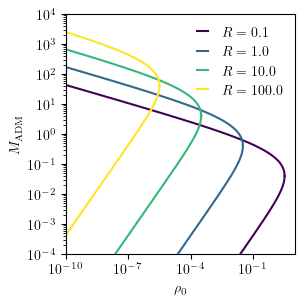

In [ ]:
# scale = 0.5
# width = scale * plot_utils.textwidth * plot_utils.cm_to_inch
# height = width

# fig = plt.figure(figsize=(width, height), tight_layout=True)


# # viridis colormap
# cmap = plt.get_cmap('viridis')
# R_vals = [0.1, 1.0, 10.0, 100.0]
# colors = [cmap(i / (len(R_vals) - 1)) for i in range(len(R_vals))]


# lower_branch_alpha_vales = np.logspace(np.log10(alpha_c), np.log10(alpha_c) + 4, 100)
# upper_branch_alpha_values = np.logspace(np.log10(alpha_c) - 2, np.log10(alpha_c), 100)

# for i, R in enumerate(R_vals):

#     rho_c = 3 / (2 * np.pi * R**2) * 5**5 / 6**6

#     alpha_c = np.sqrt(5)

#     offset = 10

#     upper_branch_rho_values = [3 / (2 * np.pi * R**2) * alpha**10 / (1 + alpha**2)**6 for alpha in upper_branch_alpha_values]
#     upper_branch_M_ADM_values = [2 * R / alpha**2 for alpha in upper_branch_alpha_values]
  
#     lower_branch_rho_values = [3 / (2 * np.pi * R**2) * alpha**10 / (1 + alpha**2)**6 for alpha in lower_branch_alpha_vales]
#     lower_branch_M_ADM_values = [2 * R / alpha**2 for alpha in lower_branch_alpha_vales]
  
#     halpha = 1
#     hrho = 3 / (2 * np.pi * R**2) * halpha**10 / (1 + halpha**2)**6
#     hM_ADM = 2 * R / halpha**2
#     hrest_M = 3 / (4 * halpha**5) * (halpha - halpha**5 + (1 + halpha**2)**3 * np.arctan(1/halpha))


#     plt.plot(upper_branch_rho_values, upper_branch_M_ADM_values, color=colors[i], label=f"$R = {R:.1f}$", linewidth=1.5)
#     plt.plot(lower_branch_rho_values, lower_branch_M_ADM_values, color=colors[i], linewidth=1.5)

# plt.ylabel(r"$M_{\text{ADM}}$")
# plt.xlabel(r"$\rho_0$")

# plt.ylim(bottom=10**(-4), top=10**(4))
# plt.xlim(left=10**(-10), right = 10)

# plt.legend(loc="upper right", fancybox=False, frameon=False, framealpha=1, ncol=1, handlelength=0.8, handletextpad=1, columnspacing=0.7)
# plt.minorticks_on()
# plt.xscale("log")
# plt.yscale("log")
# plt.savefig("img/cds_rho_vs_M_multiple.pdf", bbox_inches='tight', dpi=300)
# plt.show()